<h1><center>Práctica 4</center></h1>

The objective of this exercise is to start using tools for the segmentation of images. In this case we will be segmetating the keys on a calculator.

In [2]:
#importamos librerías necesarias
import numpy as np
import cv2
from matplotlib import pyplot as plt

%matplotlib notebook

**I. Histogram and thresholding**

Read the image calculador.tif as a gray scale image, display it and answer these questions.

    -Are the keys all the same size? Which one is the biggest
    -Do all the keys have writng in them? Are they connected?
    -Is there writing outside of the keys?
    -Which writing is brighter, the one inside or outside the keys?

<IPython.core.display.Javascript object>


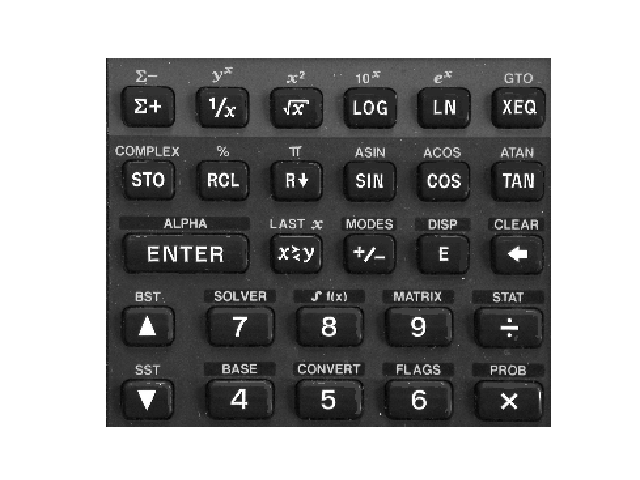

In [3]:
%matplotlib notebook
calculator = cv2.imread('calculadora.TIF', 0)
plt.figure(1)
plt.imshow(calculator, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

Use the histogram of the image calculadora.tif to identify its different areas (the keys, writing and background). Remember that displaying an image using matplotlib notebook allows you to see the intensity level of a pixel when hovering over it, use this to compare the intensity in the original image and the values on the histogram.

<IPython.core.display.Javascript object>


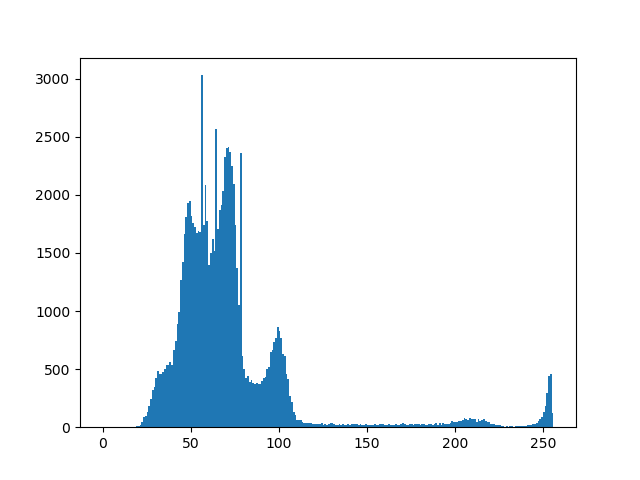

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        5.000e+00, 9.000e+00, 1.400e+01, 2.100e+01, 4.800e+01, 8.800e+01,
        9.600e+01, 1.270e+02, 1.860e+02, 2.420e+02, 3.210e+02, 3.500e+02,
        4.200e+02, 4.850e+02, 4.540e+02, 4.590e+02, 4.720e+02, 5.010e+02,
        5.320e+02, 5.340e+02, 5.650e+02, 5.350e+02, 6.630e+02, 7.390e+02,
        8.870e+02, 9.910e+02, 1.264e+03, 1.422e+03, 1.662e+03, 1.813e+03,
        1.932e+03, 1.948e+03, 1.815e+03, 1.758e+03, 1.721e+03, 1.671e+03,
        1.690e+03, 1.680e+03, 3.030e+03, 1.741e+03, 2.081e+03, 1.772e+03,
        1.392e+03, 1.502e+03, 1.620e+03, 1.520e+03, 2.568e+03, 1.710e+03,
        1.867e+03, 1.915e+03, 2.031e+03, 2.325e+03, 2.401e+03, 2.415e+03,
        2.373e+03, 2.246e+03, 2.090e+03, 1.744e+03, 1.369e+03, 1.049e+03,
        2.360e+03, 6.150e+02, 5.050e+0

In [4]:
plt.figure('Histogram')
plt.hist(calculator.ravel(),256,[0,256])

Looking at the histogram choose a threshold value that will separate the letters on the keys from the other elements. Use this value to get a binary image, save this binary image in the variable I_U, show the result.

[answer cell](#thresholding)

<IPython.core.display.Javascript object>


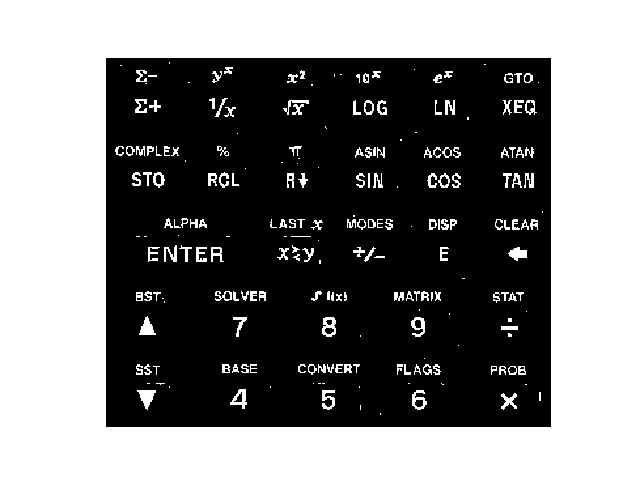

In [5]:
[thresh, I_U] = cv2.threshold(calculator, 127, 1, cv2.THRESH_BINARY)

plt.figure('Binary image')
plt.imshow(I_U, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

**II. Segmentation and characteritation of regions**

A region in image processing is a set of connected pixels that we can label. Segmentation is the process of defining and labeling those regions.
Open_CV has a function ([connectedComponentsWithStats](https://docs.opencv.org/master/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f)) for segmentation, the input has to be a binary image. The other input parameter is the connectivity which defines what <font color=red>is considered a neighbour pixel, if connectivity equals 4 it only counts pixels orthogonally connected, if it equals 8 it also considers diagonally connected pixels</font>.
Use the function connectedComponentsWithStats with our image (I_U) and leave the connectivity by default.
The function has four outputs:
1. retval: number of objects.
2. labels: the destination image, name it Seg_I_U.
3. Stats: information about the different segments, [here](https://docs.opencv.org/master/d3/dc0/group__imgproc__shape.html#gac7099124c0390051c6970a987e7dc5c5) you can see what parameters it returs, we will be using this later to get the area of the different regions.
4. centroids.

Display the segmented image using this colormap to help differentiate the regions cmap=plt.cm.get_cmap('nipy_spectral').

[answer cell](#segmentedimage1)

41
222


<IPython.core.display.Javascript object>


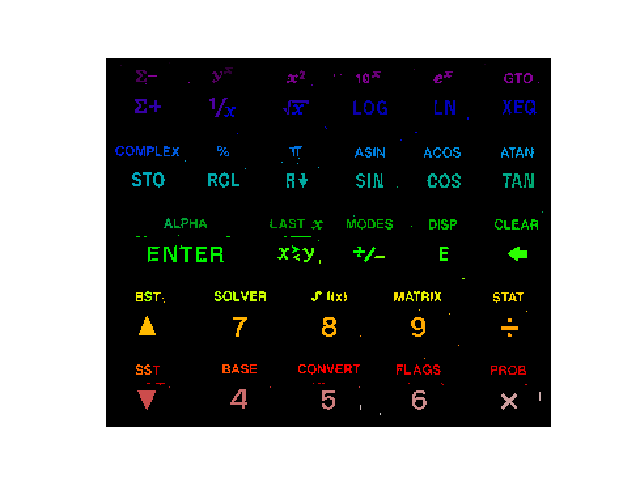

In [6]:
#Nobjects, Seg_I_U = cv2.connectedComponents(I_U)
Nobjects, Seg_I_U, stats, centroids=cv2.connectedComponentsWithStats(I_U)
print(stats[7, cv2.CC_STAT_AREA])
print(Nobjects)
plt.figure('Segmented image')
plt.imshow(Seg_I_U, cmap=plt.cm.get_cmap('nipy_spectral'))
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

For the next part of the process we will need the area of the different segments. To access this stat easier create a new array of size (1,Nobjects) where Nobjects is the number of labels, call it V_Area.
To access a especific area in the stats matrix use stats(label, CC.STAT_AREA) <font color=green>see example below</font>.

Once you have the array V_Area plot it as a bar graph to analyse the results. 
Keep in mind that the background is considered a region, to better see the areas of the regions of interest we recomend creating a new array without the first label (background) and plotting that.

[answer cell](#areasnobg)

[90933, 1, 1, 1, 1, 20, 1, 41, 30, 19, 21, 20, 33, 2, 1, 11, 27, 31, 30, 23, 29, 7, 1, 1, 1, 1, 1, 22, 34, 60, 31, 52, 29, 44, 46, 24, 59, 39, 41, 50, 36, 32, 2, 2, 2, 1, 1, 24, 27, 34, 28, 14, 24, 23, 30, 30, 23, 24, 13, 25, 22, 20, 23, 24, 22, 14, 24, 30, 1, 1, 1, 1, 1, 1, 45, 32, 53, 47, 46, 28, 49, 36, 37, 22, 42, 46, 46, 41, 28, 40, 52, 1, 1, 1, 25, 23, 14, 27, 22, 14, 22, 20, 18, 28, 32, 24, 24, 19, 27, 27, 8, 29, 21, 22, 19, 30, 21, 28, 1, 3, 2, 1, 3, 2, 16, 1, 58, 71, 50, 62, 67, 17, 31, 30, 47, 97, 37, 40, 12, 15, 3, 2, 25, 53, 20, 21, 31, 27, 25, 13, 21, 15, 31, 23, 26, 13, 11, 16, 10, 41, 12, 20, 18, 22, 14, 1, 1, 1, 1, 1, 109, 59, 97, 88, 9, 39, 8, 1, 1, 1, 23, 24, 31, 22, 25, 19, 19, 24, 27, 19, 21, 30, 12, 21, 16, 21, 28, 25, 11, 18, 27, 22, 27, 3, 8, 1, 2, 2, 1, 2, 2, 1, 1, 1, 115, 87, 81, 84, 75, 7, 4, 2]


<IPython.core.display.Javascript object>


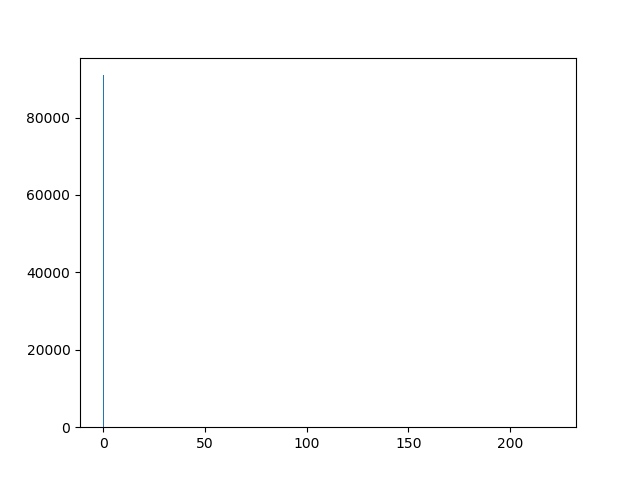

<IPython.core.display.Javascript object>


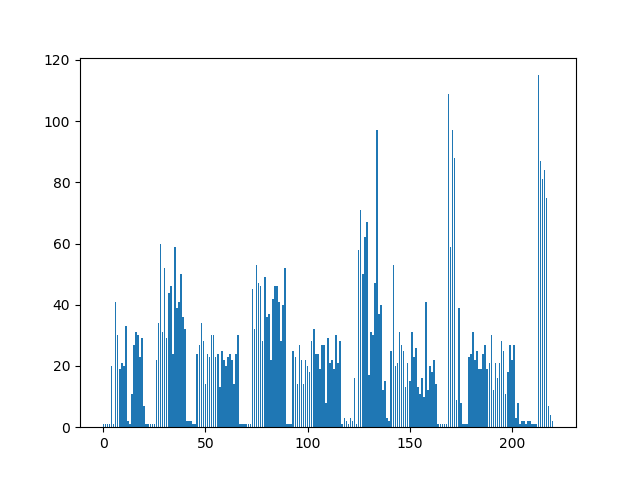

In [7]:
V_Area = []
for i in range(0, Nobjects):
    V_Area.append(stats[i, cv2.CC_STAT_AREA])
    
print(V_Area)
No_background = V_Area[:]

No_background.pop(0)

plt.figure('V_Area')

plt.bar(np.arange(len(V_Area)), V_Area)
plt.show()

plt.figure('No_background')
plt.bar(np.arange(len(No_background)), No_background)
#plt.xticks(np.arange(len(No_background)), rotation=90)
plt.show()

Going back to the labelled image (Seg_I_U) you can see that some of the regions don't correspond with letters on the calculator but, most of these regions are small. Analyse the graph with the areas of the regions and decide a threshold value to exclude the regions outside of the keys.
Build a new array called V_No_Interest with the numbers of the labels under your decided thersholf (recommended use of the for loop)

In [8]:
V_No_Interes = []

for i in range(0, Nobjects):
    if V_Area[i] <= 5:
        V_No_Interes.append(i)

print(V_No_Interes)

[1, 2, 3, 4, 6, 13, 14, 22, 23, 24, 25, 26, 42, 43, 44, 45, 46, 68, 69, 70, 71, 72, 73, 91, 92, 93, 118, 119, 120, 121, 122, 123, 125, 140, 141, 165, 166, 167, 168, 169, 177, 178, 179, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 220, 221]


Now we will be filtering the imageto to get rid of the regions outside of the keys.
Use Seg_I_U to get the label of each pixel, if their label is in the No interest array that pixel should be 0 in our new filtered image (overwrite I_U for this new image). Plot the new binary image, if you chose the correct threshold in the last segment only the letters of the calculator should have a value of 1, if that's not the case change your threshold and try again.

[answer cell](#filtersmallareas)

<IPython.core.display.Javascript object>


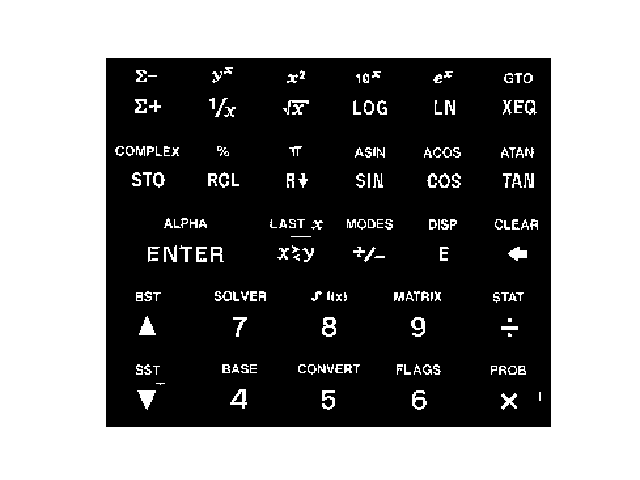

In [9]:
n_rows, n_cols = I_U.shape

for i in range(0, n_rows):
    for j in range(0, n_cols):
        label_number = Seg_I_U[i, j]
        if label_number in V_No_Interes:
            I_U[i,j] = 0

plt.figure('New Binary image')
plt.imshow(I_U, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

**III. Processing to identify the 'Enter' key**

Looking at the binary image from the last segment we can see that the letters in the same key are really close toguether, the distance between letters in the same key is always smaller than the distance between letters in other keys. We are going to process the image I_U (from las segment) so all the characters in a region are associated to the same key, this will allow us to identify each key as a different region. Use an spatial filter (with a 5X5 kernel) to filter I_U. Call the resulting image I_U_Fmedia. 

Keep in mind the data type of the image, if the input of cv2.filter2D() is a binary image the output will also be a binary image.

Display the filterd image and its histogram.

[answer cell](#filteredimage)

<IPython.core.display.Javascript object>


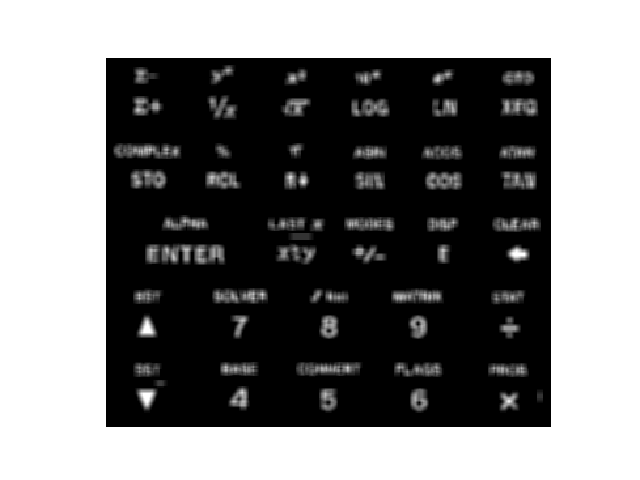

<IPython.core.display.Javascript object>


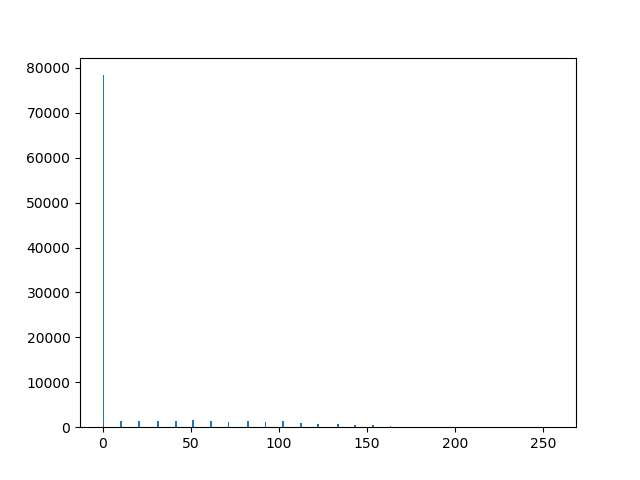

In [10]:
kernel = np.ones((5,5),np.float32)/(5*5)
I_U = I_U *255
I_U_Fmedia = cv2.filter2D(I_U, -1, kernel, borderType= cv2.BORDER_REFLECT)

plt.figure('Filter media')
plt.imshow(I_U_Fmedia, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

plt.figure('I_U_Fmedia histogram')
plt.hist(I_U_Fmedia.ravel(),256,[0,256]);

Threshold the image I_U_Fmedia, choose the threshold value so all the non-zero pixels are inside of the original keys. Display this image (call it I_U_Fmedia_Th). Looking at this image can you count the number of keys accurately? Can you think of a way to get just the 'Enter' key using the commands taught in this exercise?

[answer cell](#lastbinary)

<IPython.core.display.Javascript object>


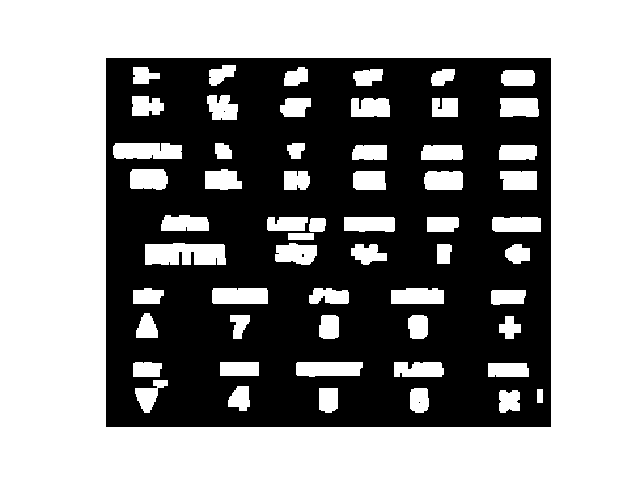

In [11]:
[thresh, I_U_Fmedia_Th] = cv2.threshold(I_U_Fmedia, 1, 1, cv2.THRESH_BINARY)

plt.figure('Processed Binary image')
plt.imshow(I_U_Fmedia_Th, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

Implement a series of instructions that will result in an image (I_Enter) in gray scale the same size of the original image. This image must have a value of 0 in every pixel except the ones corresponding with the letters spelling 'Enter' in the calculator, this last ones must keep their value from the original image.

Hint: it's useful to remember that one of the stats provided by the function cv2.connectedComponentsWithStats() is the area of each of the regions, and that the background is considered as one of the regions.

[answer cell](#finalimage)

<IPython.core.display.Javascript object>


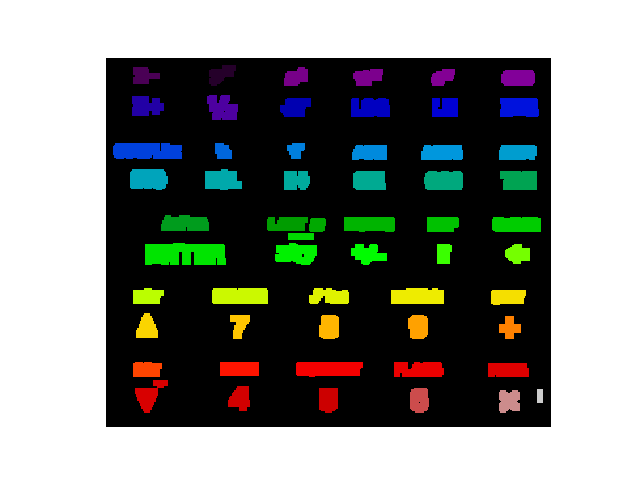

<IPython.core.display.Javascript object>


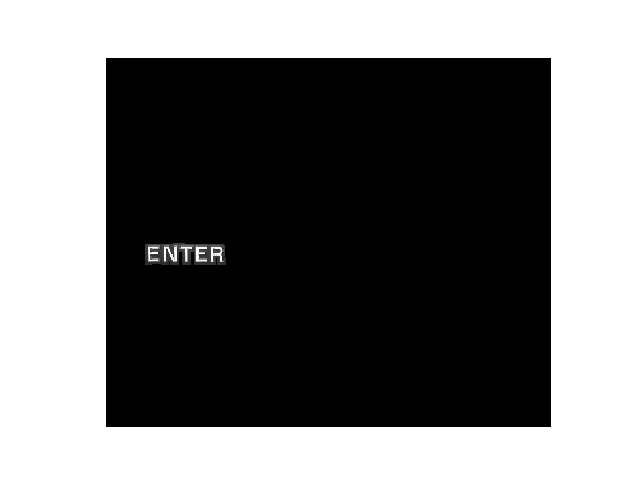

In [12]:
Nobjects_Enter, Seg_I_U_Enter, statsEnter, centroids=cv2.connectedComponentsWithStats(I_U_Fmedia_Th)

plt.figure('Segmented image enter')
plt.imshow(Seg_I_U_Enter, cmap=plt.cm.get_cmap('nipy_spectral'))
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

V_Area_Enter = []
for i in range(0, Nobjects_Enter):
    V_Area_Enter.append(statsEnter[i, cv2.CC_STAT_AREA])

In_Order = sorted(V_Area_Enter, reverse= True)

EnterArea = In_Order[1] #The biggest area is the background, the second biggest the enter key

EnterLabel = V_Area_Enter.index(EnterArea)

for i in range(0, n_rows):
    for j in range(0, n_cols):
        label_number = Seg_I_U_Enter[i, j]
        if label_number != EnterLabel:
            calculator[i,j] = 0

plt.figure('Enter image')
plt.imshow(calculator, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()


<h2>Cells with the answer images</h2>

I. Histogram and thresholding

<a id='thresholding'></a>

![thresholding](answerimages/thresholding.PNG)

II. Segmentation and characteritation of regions

    - Segmented image

<a id='segmentedimage1'></a>

![segementedimage1](answerimages/segmentedimage1.PNG)

    - Areas without background
    
<a id='areasnobg'></a>

![areasnobg](answerimages/areasnobg.PNG)

    - Filtering small areas
    
<a id='filtersmallareas'></a>

![filtersmallareas](answerimages/filtersmallareas.PNG)

III. Processing to identify the 'Enter' key

    - Using a spatial filter

<a id='filteredimage'></a>

![filteredimage](answerimages/filteredimage.PNG)

    - Thresholding

<a id='lastbinary'></a>

![lastbinary](answerimages/lastbinary.PNG)

    - Final image

<a id='finalimage'></a>

![finalimage](answerimages/finalimage.PNG)